In [8]:
import pandas as pd
import numpy as np
import simpy
import random
import argparse

In [ ]:



class goods:
    def __init__(self, env, name):
        self.env = env
        self.waitingtime = 0
        self.starttime = 0
        self.ifserve = False
        self.name = name
    def updatewaitingtime(self,env):
        while True:
            if self.ifserve == True:
                self.waitingtime = env.now - self.starttime

In [ ]:
import simpy
import numpy as np

global_uav_num = 0
global_goods_num = 0
global_uav_waitingtime = 0
global_goods_waitingtime = 0

class UAV:
    def __init__(self, env, name,starttime):
        self.env = env
        self.waitingtime = 0
        self.starttime = starttime
        self.ifserve = False
        self.name = name

    def start_service(self, env):
        self.ifserve = True

    def end_service(self, env):
        if self.ifserve:
            self.waitingtime = env.now - self.starttime
            self.ifserve = False

class Goods:
    def __init__(self, env, name,starttime=0):
        self.env = env
        self.waitingtime = 0
        self.starttime = starttime
        self.ifserve = False
        self.name = name

    def enter_queue(self, env):
        self.starttime = env.now

    def start_service(self, env):
        self.ifserve = True

    def end_service(self, env):
        if self.ifserve:
            self.waitingtime = env.now - self.starttime
            self.ifserve = False

# class DistributionStation:
#     def __init__(self, env, goodsarrivetime, goodsexp, uavexp, service_time_mean):
#         self.env = env
#         self.goodsarrivetime = goodsarrivetime
#         self.goodsexp = goodsexp
#         self.uavexp = uavexp
#         self.service_time_mean = service_time_mean
#         self.uavqueue = simpy.Store(env) # Changed to simpy.Store
#         self.goodsqueue = simpy.Store(env)
#         self.uav_list = [] # To track individual UAVs if needed

#         self.goods_count = 0
#         env.process(self.goods_arrival_process())
#         env.process(self.uav_arrival_process())
#         env.process(self.serving_process())

#     def goods_arrival_process(self):
#         while True:
#             yield self.env.timeout(self.goodsarrivetime)
#             num_goods = max(1, int(np.random.exponential(scale=self.goodsexp))) # Ensure at least one good arrives
#             print(f"Goods batch of size {num_goods} arrives at {self.env.now}")
#             for i in range(num_goods):
#                 goods1 = Goods(self.env, f"goods {self.goods_count}",starttime=self.env.now)
#                 goods1.enter_queue(self.env)
#                 yield self.goodsqueue.put(goods1) # Yield when putting into the store
#                 self.goods_count += 1
#                 print(f"Goods {goods1.name} arrive at {self.env.now}")

#     def uav_arrival_process(self):
#         uav_id = 0
#         while True:
#             yield self.env.timeout(np.random.exponential(scale=self.uavexp))
#             uav1 = UAV(self.env, f"uav {uav_id}",starttime=self.env.now)
#             self.uav_list.append(uav1)
#             yield self.uavqueue.put(uav1) # Yield when putting into the store
#             print(f"UAV {uav1.name} arrives at {self.env.now}")
#             uav_id += 1

#     def serving_process(self):
#         global global_uav_num
#         global global_goods_num
#         global global_uav_waitingtime
#         global global_goods_waitingtime

#         while True:
#             # Wait for a good and a UAV to be available
#             goods_to_serve = yield self.goodsqueue.get()
#             uav_available = yield self.uavqueue.get() # Get a UAV from the store

#             # Start service
#             goods_to_serve.start_service(self.env)
#             uav_available.start_service(self.env)

#             goods_to_serve.waitingtime = self.env.now - goods_to_serve.starttime
#             uav_available.waitingtime = self.env.now - uav_available.starttime

#             global_goods_waitingtime += goods_to_serve.waitingtime
#             global_uav_waitingtime += uav_available.waitingtime

#             print(f"UAV {uav_available.name} starts serving {goods_to_serve.name} at {self.env.now}")
#             # yield self.env.timeout(np.random.exponential(scale=self.service_time_mean)) # Service time

#             # End service
#             goods_to_serve.end_service(self.env)
#             uav_available.end_service(self.env)

#             global_goods_num += 1
#             global_uav_num += 1
#             print(f"UAV {uav_available.name} finishes serving {goods_to_serve.name} at {self.env.now}, Goods waiting time: {goods_to_serve.waitingtime:.2f}, UAV waiting time: {uav_available.waitingtime:.2f}")

# env = simpy.Environment()
# goodsarrivetime_mean = 5  # Average time between batch arrivals
# goodsexp_mean = 50        # Average number of goods per batch
# uavexp_mean = 1/20          # Average time between UAV arrivals (inverse of arrival rate)
# service_time_mean = 2     # Average service time per good

# station = DistributionStation(env, goodsarrivetime_mean, goodsexp_mean, uavexp_mean, service_time_mean)

# simulation_duration = 200
# env.run(until=simulation_duration)

# if global_goods_num > 0:
#     print(f"Average Goods Waiting Time (Served): {global_goods_waitingtime / global_goods_num:.2f}")
# else:
#     print("No goods were served.")

# if global_uav_num > 0:
#     print(f"Average UAV Waiting Time (Served): {global_uav_waitingtime / global_uav_num:.2f}")
# else:
#     print("No UAVs performed service.")

# # Calculate waiting time for goods remaining in the queue
# remaining_goods_wait_time = 0
# remaining_goods = list(station.goodsqueue.items)
# num_remaining_goods = len(remaining_goods)
# for good in remaining_goods:
#     remaining_goods_wait_time += env.now - good.starttime

# if num_remaining_goods > 0:
#     print(f"Average Goods Waiting Time (In Queue at End): {remaining_goods_wait_time / num_remaining_goods:.2f}")
# else:
#     print("No goods remaining in the queue.")

# # Calculate waiting time for UAVs remaining in the queue
# remaining_uav_wait_time = 0
# remaining_uavs = list(station.uavqueue.items)
# num_remaining_uavs = len(remaining_uavs)
# for uav_obj in remaining_uavs:
#     remaining_uav_wait_time += env.now - uav_obj.starttime

# if num_remaining_uavs > 0:
#     print(f"Average UAV Waiting Time (In Queue at End): {remaining_uav_wait_time / num_remaining_uavs:.2f}")
# else:
#     print("No UAVs remaining in the queue.")

In [ ]:
service_num = 0
global_var = 0
class ChargingStation:
    def __init__(self, env, station_id,latitude, longitude,battery_num,service_time,charge_time,min_num,charge_window=1):
        self.env = env
        self.station_id = station_id
        self.battery_num = battery_num
        self.latitude = latitude
        self.longitude = longitude
        self.service_time = service_time
        self.charge_time = charge_time
        self.min_num = min_num
        self.charge_window = charge_window  # Charge window in minutes, default is 1 minute
        self.queue = [[] for _ in range(charge_window)]  # Initialize a list of queues for each minute in the charge window
        self.busy = [False] * charge_window  # Busy status for each minute in the charge window
        self.queuemaxnum = 500
        self.env.process(self.charge())
        self.env.process(self.serve())
        


    def charge(self):
        yield self.env.timeout(np.random.exponential(scale=self.charge_time))
        self.battery_num+=2
        print(f" Station {self.station_id} Charge at {self.env.now} have battery {self.battery_num} ")


        
    def serve(self):
        global global_var
        global service_num
        global_uav_num = 0
        for i in range(self.charge_window):
            if self.busy[i] == False and len(self.queue[i]) < self.queuemaxnum and self.battery_num > self.min_num and len(self.queue[i]) > 0:
                uav = self.queue[i].pop(0)
                self.busy[i] = True
                uav.starttime = self.env.now
                print(f"Station {self.station_id} starts serving UAV {uav.name} at {self.env.now}")
                yield self.env.timeout(np.random.exponential(scale=self.service_time))
                uav.ifserve = True
                uav.waitingtime = self.env.now - uav.starttime
                global_var += uav.waitingtime
                service_num += 1
                self.battery_num -= 1
                print(f"Station {self.station_id} finished serving UAV {uav.name} at {self.env.now}, waiting time: {uav.waitingtime:.2f}")
                self.busy[i] = False
                break
            if len(self.queue[i])>0 and self.battery_num>self.min_num:
                self.env.process(self.serve(self.queue[0]))

In [ ]:
class Truck:
    def __init__(self, env, truck_id,latitude, longitude,speed,order=0,capacity, iffree = True,dist_id=0):
        self.env = env
        self.truck_id = truck_id
        self.capacity = capacity
        self.latitude = latitude
        self.longitude = longitude
        self.busy = False
        self.speed = speed
        self.order = order
        self.iffree  =iffree
        self.dist_id = dist_id

    
    def transport(self):
        self.busy = True
        transport_time = 2*calculate_time(s_lat, s_lon, self.latitude, self.longitude)/self.speed  
        yield self.env.timeout(transport_time)
        self.busy = False
        print(f" Truck {self.truck_id} arrive at {self.latitude},{self.longitude} at {self.env.now}")
        
        

In [ ]:
class Distribution_center:
    def __init__(self, env, station_id,latitude, longitude,battery_num,service_time,charge_time,min_num):
        self.env = env
        self.station_id = station_id
        self.battery_num = battery_num
        self.latitude = latitude
        self.longitude = longitude
        self.truck_num = 1
        self.trucklist = [Truck(env,i+station_id,latitude,longitude,32) for i in range(self.truck_num)]
        self.charge_time = char
        self.uavqueue = []
    
    
    def charge(self):
        yield self.env.timeout(np.random.exponential(scale=self.charge_time))
        self.battery_num+=2
        print(f" Station {self.station_id} Charge at {self.env.now} have battery {self.battery_num} ")


        
    def serve(self,uav):
        global global_var
        print(f"serve function {uav.uav_id},station{self.station_id}, queue length :{len(self.queue)}")
        uav.ifcharge = True
        print(f"serve function {uav.uav_id},charge status :{uav.ifcharge}")
        if len(self.queue)>0 and self.battery_num>self.min_num:
            self.busy = True
            yield self.env.timeout(np.random.exponential(scale=self.service_time))
            if len(self.queue)>0: 
                uav1 = self.queue[0]
                self.queue.pop(0).ifcharge = False
                self.battery_num-=2
                print(f"UAV {uav1.uav_id} at time {self.env.now} at {self.station_id} charge battery left {self.battery_num}")
                self.env.process(self.charge())
                print(f"after serving UAV {uav1.uav_id},charge status :{uav1.ifcharge}")
                print("-------------------")
            global_var += 1
            self.busy = False
        if len(self.queue)>0 and self.battery_num>self.min_num:
            self.env.process(self.serve(self.queue[0]))
            
            

In [ ]:
def calculate_distance(lat1, lon1, lat2, lon2):
    earth_radius = 6371.0  # 地球半径（以公里为单位）

    # 将经纬度转换为弧度
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine公式
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = earth_radius * c
    return distance

In [ ]:
class Order:
    def __init__(self, env, demand_point_id,uav_id,order_id,servicetime,beigin_time,end_time,direc,distance,if_finished = False):
        self.env = env
        self.demand_point_id = demand_point_id
        self.uav_id = uav_id
        self.order_id = order_id
        self.begin_time = beigin_time
        self.end_time = end_time
        self.servicetime = servicetime
        self.direc = direc
        self.distance = distance
        self.if_finished = if_finished

In [ ]:
finished_order = []
chargelist  = []
finished_num = 0
s_lat = 30.2741
s_lon = 120.1476
class Service_point:
    def __init__(self, env, demand_point_id,arrival_time,latitude, longitude,serviceid,servicetime):
        self.env = env
        self.demand_point_id = demand_point_id
        self.arrival_time = arrival_time
        self.latitude = latitude
        self.longitude = longitude
        self.serviceid = serviceid
        self.servicetime = servicetime


        
        
        

class UAV:
    def __init__(self, env, uav_id,latitude, longitude,speed,order=0,iffree = True,ifcharge = False):
        self.env = env
        self.uav_id = uav_id
        self.latitude = latitude
        self.longitude = longitude
        self.busy = False
        self.speed = speed
        self.order = order
        self.iffree  =iffree
        self.ifcharge  =ifcharge
        self.target = 0
        
        
        
    def fulfill_demand(self,order):
        global finished_order
        global finished_num
        global chargelist
        for i in range(location.shape[0]):
            chargelist.append(ChargingStation(self.env,i,location.iloc[i,2],location.iloc[i,3],10,0.1,5,2))
        while True:
            self.order = order
            dist = self.order.distance
            direc = self.order.direc
            self.iffree = False
            while self.target!=len(direc):
                if self.ifcharge==False:
                    yield self.env.timeout(dist[self.target] / self.speed)
                    print(f"UAV{self.uav_id}  arrive at point {direc[self.target]} at time {self.env.now}, target:{self.target}")
                    chargelist[direc[self.target]].queue.append(self)
                    #self.ifcharge=True
                    self.env.process(chargelist[direc[self.target]].serve(self))
                    self.target+=1
            #print(f"Demand of{self.order.begin_time} / {self.order.order_id} finished at time {self.env.now}")
            if self.target==len(direc):
                finished_order.append(order)
                finished_num+=1
                break

In [ ]:
total_orders_generated=0
total_order = []
class Demand_point:
    total_orders_generated = 0  # 类变量用于跟踪所有需求点的需求数量

    def __init__(self, env, demand_point_id, latitude, longitude, uavnum, demand_time):
        self.env = env
        self.demand_point_id = demand_point_id
        self.latitude = latitude
        self.longitude = longitude
        self.uavnum = uavnum
        self.uavqueue = []
        self.demand_time = demand_time
        self.orders_generated = 0

    def generate_demand(self):
        global total_orders_generated
        global total_order
        while True:
            order_id = random.randint(1, 10000)
            self.orders_generated += 1  # 增加订单数量计数器
            total_orders_generated+=1
            direc = [4,5,0]
            distance = [500,530,430]
            neworder = Order(self.env, self.demand_point_id,0,order_id,0,self.env.now,0,direc,distance)
            total_order.append(neworder)
            if(self.uavnum>0):
                uav = self.uavqueue.pop(0)
                self.uavnum-=1
                self.env.process(uav.fulfill_demand(neworder))
            #print(f"Demand generated at point {self.demand_point_id} at time {self.env.now}")
            yield self.env.timeout(np.random.exponential(scale=self.demand_time))

In [ ]:
import simpy
import numpy as np
import random
import pandas as pd

connect = pd.read_excel(r'data/connect2.xlsx')
dist1 = pd.read_excel(r'data/dist2.xlsx')
location = pd.read_excel(r'data/location2.xlsx')
service_point_number = 249

service_num = 0
global_var = 0


class ChargingStation:
    def __init__(self, env, station_id, latitude, longitude, battery_num, service_time, charge_time, min_num):
        self.env = env
        self.station_id = station_id
        self.battery_num = battery_num
        self.latitude = latitude
        self.longitude = longitude
        self.service_time = service_time
        self.charge_time = charge_time
        self.min_num = min_num
        self.busy = False
        self.queue = []
        self.service_num = 400

    def charge(self):
        yield self.env.timeout(np.random.exponential(scale=self.charge_time))
        self.battery_num += 2
        print(f" Station {self.station_id} Charge at {self.env.now} have battery {self.battery_num} ")
        

    def servetime(self):
        yield self.env.timeout(0.1)

    def servetime2(self):
        if len(self.queue) < self.service_num:
            yield self.env.timeout(0.15)
        else:
            while len(self.queue) >= self.service_num:
                yield self.env.timeout(0.5)

    def serve(self, uav):
        global global_var
        print(f"serve function {uav.uav_id},station{self.station_id}, queue length :{len(self.queue)}")
        uav.ifcharge = True
        continue_serve = True
        while self.battery_num < self.min_num:
            yield self.env.process(self.charge())
        while continue_serve and uav.ifcharge != False:
            if len(self.queue) > 0 and self.battery_num > self.min_num:
                self.busy = True
                print(f"Try to service serve function {uav.uav_id},time {self.env.now}")
                if len(self.queue) > 0 and self.battery_num > self.min_num:
                    if self.station_id == service_point_number:
                        yield self.env.process(self.servetime2())
                    else:
                        yield self.env.process(self.servetime())
                    uav1 = self.queue[0]
                    self.queue.pop(0).ifcharge = False
                    print(f"After Go service serve function {uav1.uav_id},time {self.env.now}")
                    self.battery_num -= 2
                    print(
                        f"UAV {uav1.uav_id} at time {self.env.now} at {self.station_id} charge battery left {self.battery_num}")
                    self.env.process(self.charge())
                    global_var += 1
                    self.busy = False
                    if uav1.uav_id == uav.uav_id:
                        continue_serve = False  # 设置标志为 False，退出循环
                        #yield self.env.timeout(0)
                    else:
                        if len(self.queue) > 0 and self.battery_num > self.min_num:
                            self.env.process(self.serve(self.queue[0]))
                        else:
                            pass


class Order:
    def __init__(self, env, demand_point_id, uav_id, order_id, servicetime, beigin_time, end_time, direc, distance,
                 if_finished=False):
        self.env = env
        self.demand_point_id = demand_point_id
        self.uav_id = uav_id
        self.order_id = order_id
        self.begin_time = beigin_time
        self.end_time = end_time
        self.servicetime = servicetime
        self.direc = direc
        self.distance = distance
        self.if_finished = if_finished


finished_order = []
service_timelist = []
chargelist = []
finished_num = 0
uav_cost = 0


class Service_point:
    def __init__(self, env, demand_point_id, arrival_time, latitude, longitude, serviceid, servicetime):
        self.env = env
        self.demand_point_id = demand_point_id
        self.arrival_time = arrival_time
        self.latitude = latitude
        self.longitude = longitude
        self.serviceid = serviceid
        self.servicetime = servicetime


class UAV:
    def __init__(self, env, uav_id, latitude, longitude, speed, order=0, iffree=True, ifcharge=False):
        self.env = env
        self.uav_id = uav_id
        self.latitude = latitude
        self.longitude = longitude
        self.busy = False
        self.speed = speed
        self.order = order
        self.iffree = iffree
        self.ifcharge = ifcharge
        self.target = 0
        self.start_time = 0
        self.end_time = 0

    def fulfill_demand(self, order):
        global finished_order
        global finished_num
        global chargelist
        global service_timelist
        for i in range(location.shape[0]):
            chargelist.append(ChargingStation(self.env, i, location.iloc[i, 2], location.iloc[i, 3], 5, 2, 2, 2))
        while True:
            self.order = order
            dist = self.order.distance
            direc = self.order.direc
            self.start_time = self.env.now
            self.iffree = False
            while self.target != len(direc):
                if self.ifcharge == False:
                    yield self.env.timeout(dist[self.target] / self.speed)
                    print(
                        f"UAV{self.uav_id}  arrive at point {direc[self.target]} at time {self.env.now}, target:{self.target}")
                    chargelist[direc[self.target]].queue.append(self)
                    # self.ifcharge=True
                    yield self.env.process(chargelist[direc[self.target]].serve(self))
                    #yield self.env.timeout(0)
                    self.target += 1
            # print(f"Demand of{self.order.begin_time} / {self.order.order_id} finished at time {self.env.now}")
            if self.target == len(direc):
                finished_order.append(order)
                finished_num += 1
                self.iffree = True
                self.end_time = self.env.now
                service_timelist.append(self.end_time - self.start_time)
                break


total_orders_generated = 0
total_order = []


class Demand_point:
    total_orders_generated = 0  # 类变量用于跟踪所有需求点的需求数量

    def __init__(self, env, demand_point_id, latitude, longitude, uavnum, demand_time):
        self.env = env
        self.demand_point_id = demand_point_id
        self.latitude = latitude
        self.longitude = longitude
        self.uavnum = uavnum
        self.uavqueue = []
        self.demand_time = demand_time
        self.orders_generated = 0

    def waitnewuav(self):
        while self.uavnum <= 0:
            print("Wait for new UAV")
            yield self.env.timeout(5)

    def generate_demand(self):
        global total_orders_generated
        global total_order
        while True:
            order_id = random.randint(1, 10000)
            self.orders_generated += 1  # 增加订单数量计数器
            total_orders_generated += 1
            direc = [18, 69, 180, 210, 249, 217, 72, 66, 0]
            distance = [dist1.iloc[0, 18], dist1.iloc[18, 69], dist1.iloc[69, 180], dist1.iloc[180, 210],
                        dist1.iloc[210, 249], dist1.iloc[249, 217], dist1.iloc[217, 72], dist1.iloc[72, 66],
                        dist1.iloc[66, 0]]
            neworder = Order(self.env, self.demand_point_id, 0, order_id, 0, self.env.now, 0, direc, distance)
            total_order.append(neworder)
            if self.uavnum > 0:
                uav = self.uavqueue.pop(0)
                self.uavnum -= 1
                self.env.process(uav.fulfill_demand(neworder))
                yield self.env.timeout(0)
                self.uavqueue.append(uav)
                neworder.if_finished = True
                neworder.end_time = self.env.now
            else:
                self.env.process(self.waitnewuav())
            # print(f"Demand generated at point {self.demand_point_id} at time {self.env.now}")
            yield self.env.timeout(np.random.exponential(scale=self.demand_time))


def run_simulation(num_demand_points, latitude, longitude, uavnum, demand_time, simulation_time):
    # 创建仿真环境
    env = simpy.Environment()
    # 创建需求点并添加到仿真环境中
    demand_points = []
    for i in range(num_demand_points):
        demand_point = Demand_point(env, demand_point_id=i, latitude=latitude, longitude=longitude, uavnum=uavnum,
                                    demand_time=demand_time)

        used_ids = set()  # 存储已使用的uav_id
        for i in range(demand_point.uavnum):
            uavid = random.randint(1, 50000)
            while uavid in used_ids:  # 检查uavid是否已存在于集合中
                uavid = random.randint(1, 50000)
            used_ids.add(uavid)  # 将uavid添加到集合中
            demand_point.uavqueue.append(
                UAV(env, uav_id=uavid, latitude=demand_point.latitude, longitude=demand_point.longitude,
                    speed=random.randint(30, 50)))

        demand_points.append(demand_point)
        env.process(demand_point.generate_demand())
    # 运行仿真直到指定时间
    env.run(until=simulation_time)
    return demand_points


# 调用函数来运行仿真
num_demand_points = 4
latitude = 37.7749
longitude = -122.4194
uavnum = 300
demand_time = 0.1
simulation_time = 24

demand_points = run_simulation(num_demand_points, latitude, longitude, uavnum, demand_time, simulation_time)

In [ ]:
if 0.1%0.05==0:
    print("1")

In [ ]:
connect = pd.read_excel(r'data/connect2.xlsx')
dist1 = pd.read_excel(r'data/dist2.xlsx')
location = pd.read_excel(r'data/location2.xlsx')
location

In [ ]:
import simpy
import numpy as np
import random
import pandas as pd

connect = pd.read_excel(r'data/connect2.xlsx')
dist1 = pd.read_excel(r'data/dist2.xlsx')
location = pd.read_excel(r'data/location2.xlsx')
service_point_number = 249

service_num = 0
global_var = 0


class ChargingStation:
    def __init__(self, env, station_id, latitude, longitude, battery_num, service_time, charge_time, min_num):
        self.env = env
        self.station_id = station_id
        self.battery_num = battery_num
        self.latitude = latitude
        self.longitude = longitude
        self.service_time = service_time
        self.charge_time = charge_time
        self.min_num = min_num
        self.busy = False
        self.queue = []
        self.service_num = 400

    def charge(self):
        yield self.env.timeout(np.random.exponential(scale=self.charge_time))
        self.battery_num += 2
        print(f" Station {self.station_id} Charge at {self.env.now} have battery {self.battery_num} ")
        

    def servetime(self):
        yield self.env.timeout(np.random.exponential(scale=self.service_time))

    def servetime2(self):
        if len(self.queue) < self.service_num:
            yield self.env.timeout(np.random.exponential(scale=self.service_time)+np.random.exponential(scale=0.017))
        else:
            while len(self.queue) >= self.service_num:
                yield self.env.timeout(0.001)
                
    def servetime2(self):
        yield self.env.timeout(np.random.exponential(scale=self.service_time)+np.random.exponential(scale=0.017))

    def serve(self, uav):
        global global_var
        print(f"serve function {uav.uav_id},station{self.station_id}, queue length :{len(self.queue)}")
        uav.ifcharge = True
        continue_serve = True
        while self.queue[0].uav_id != uav.uav_id:
            yield self.env.timeout(0.001)
        while self.battery_num < self.min_num:
            yield self.env.process(self.charge())
        while continue_serve and uav.ifcharge != False:
            if len(self.queue) > 0 and self.battery_num >= self.min_num and self.queue[0].uav_id == uav.uav_id:
                self.busy = True
                print(f"Try to service serve function {uav.uav_id},time {self.env.now}")
                for i in uavlist:
                    i.service_time = self.env.now - i.start_time
                queuelist[self.station_id].append(len(self.queue))
                if len(self.queue) > 0 and self.battery_num >= self.min_num:
                    if self.queue[0].uav_id==uav.uav_id:
                        if self.station_id == service_point_number:
                            yield self.env.process(self.servetime2())
                        else:
                            yield self.env.process(self.servetime())
                    else:
                        yield self.env.process(self.servetime())
                    uav1 = self.queue[0]
                    self.queue.pop(0).ifcharge = False
                    uav1.ifcharge = False
                    print(f"After Go service serve function {uav1.uav_id},time {self.env.now}")
                    self.battery_num -= 2
                    print(
                        f"UAV {uav1.uav_id} at time {self.env.now} at {self.station_id} charge battery left {self.battery_num}")
                    self.env.process(self.charge())
                    global_var += 1
                    self.busy = False
                    if uav1.uav_id == uav.uav_id:
                        print("now")
                        continue_serve = False  # 设置标志为 False，退出循环
                        break
                    else:
                        if len(self.queue) > 0 and self.battery_num > self.min_num:
                            print("continue")
                            self.env.process(self.serve(self.queue[0]))
                        else:
                            pass
                if self.battery_num < self.min_num:
                    yield self.env.process(self.charge())


class Order:
    def __init__(self, env, demand_point_id, uav_id, order_id, servicetime, beigin_time, end_time, direc, distance,
                 if_finished=False):
        self.env = env
        self.demand_point_id = demand_point_id
        self.uav_id = uav_id
        self.order_id = order_id
        self.begin_time = beigin_time
        self.end_time = end_time
        self.servicetime = servicetime
        self.direc = direc
        self.distance = distance
        self.if_finished = if_finished


finished_order = []
service_timelist = []
chargelist = []
finished_num = 0
uav_cost = 0
latitudelist = [[]]



class Service_point:
    def __init__(self, env, demand_point_id, arrival_time, latitude, longitude, serviceid, servicetime):
        self.env = env
        self.demand_point_id = demand_point_id
        self.arrival_time = arrival_time
        self.latitude = latitude
        self.longitude = longitude
        self.serviceid = serviceid
        self.servicetime = servicetime


class UAV:
    def __init__(self, env, uav_id, latitude, longitude, speed, order=0, iffree=True, ifcharge=False):
        self.env = env
        self.uav_id = uav_id
        self.latitude = latitude
        self.longitude = longitude
        self.busy = False
        self.speed = speed
        self.order = order
        self.iffree = iffree
        self.ifcharge = ifcharge
        self.target = 0
        self.start_time = 0
        self.end_time = 0
        self.service_time = 0

    def fulfill_demand(self, order):
        global finished_order
        global finished_num
        global chargelist
        global service_timelist
        for i in range(location.shape[0]):
            chargelist.append(ChargingStation(self.env, i, location.iloc[i, 2], location.iloc[i, 3], 5000, 0.0027, 2, 2))
        while True:
            self.order = order
            dist = self.order.distance
            direc = self.order.direc
            self.start_time = self.env.now
            self.service_time = 0
            self.iffree = False
            while self.target != len(direc):
                if self.ifcharge == False:
                    if self.target < len(direc):
                        yield self.env.timeout(dist[self.target] / self.speed)
                        print(
                            f"UAV{self.uav_id}  arrive at point {direc[self.target]} at time {self.env.now}, target:{self.target}")
                        chargelist[direc[self.target]].queue.append(self)
                        # self.ifcharge=True
                        yield self.env.process(chargelist[direc[self.target]].serve(self))
                        yield self.env.timeout(0)
                        self.target += 1
            # print(f"Demand of{self.order.begin_time} / {self.order.order_id} finished at time {self.env.now}")
            if self.target == len(direc):
                finished_order.append(order)
                finished_num += 1
                for uav1 in uavlist:
                    if uav1.target == len(uav1.order.direc):
                        finisheduavlist.append(uav1)
                        uavlist.remove(uav1)
                        uav1.order.if_finished = True
                        uav1.order.end_time = self.env.now
                        demand_points[uav1.order.direc[-1]].uavqueue.append(uav1)
                        demand_points[uav1.order.direc[-1]].uavnum+=1
                self.iffree = True
                self.end_time = self.env.now
                service_timelist.append(self.end_time - self.start_time)
                break



total_orders_generated = 0
total_order = []
unassigned_order = []
assigned_order = []
uavlist = []
finisheduavlist = []
queuelist = []
for i in range(location.shape[0]):
    queuelist.append([])


class Demand_point:
    total_orders_generated = 0  # 类变量用于跟踪所有需求点的需求数量

    def __init__(self, env, demand_point_id, latitude, longitude, uavnum, demand_time):
        self.env = env
        self.demand_point_id = demand_point_id
        self.latitude = latitude
        self.longitude = longitude
        self.uavnum = uavnum
        self.uavqueue = []
        self.demand_time = demand_time
        self.orders_generated = 0

    def waitnewuav(self):
        while self.uavnum <= 0:
            print("Wait for new UAV")
            for uav1 in uavlist:
                if uav1.target == len(uav1.order.direc):
                    finisheduavlist.append(uav1)
                    uavlist.remove(uav1)
                    uav1.order.if_finished = True
                    uav1.order.end_time = self.env.now
                    if uav1.order.direc[-1]==self.demand_point_id:
                        self.uavqueue.append(uav1)
                        self.uavnum+=1
            yield self.env.timeout(0.1)

    def generate_demand(self):
        global total_orders_generated
        global total_order
        global unassigned_order
        global assigned_order
        global uavlist
        global queuelist
        while True:
            order_id = random.randint(1, 10000)
            self.orders_generated += 1  # 增加订单数量计数器
            total_orders_generated += 1
            #direc = [18, 69, 180, 210, 249, 217, 72, 66, 0]
            direc = [[15,69,177,175,217,249,213,176,181,72,22,18,10,0],[209,230,249,211,1],[200,249,215,204,202,197,199,201,192,2],[154,249,97,3]]
            distance = []
            for i in range(len(direc)):
                distance1 = []
                for j in range(len(direc[i])):
                    if j==0:
                        distance1.append(dist1.iloc[i,direc[i][j]])
                    else:
                        distance1.append(dist1.iloc[direc[i][j-1],direc[i][j]])
                distance.append(distance1) 
            neworder = Order(self.env, self.demand_point_id, 0, order_id, 0, self.env.now, 0, direc[self.demand_point_id], distance[self.demand_point_id])
            total_order.append(neworder)
            unassigned_order.append(neworder)
            if self.uavnum > 0 and len(unassigned_order)<2:
                uav = self.uavqueue.pop(0)
                uavlist.append(uav)
                self.uavnum -= 1
                unassigned_order.pop(0)
                assigned_order.append(neworder)
                self.env.process(uav.fulfill_demand(neworder))
                yield self.env.timeout(0)
            if self.uavnum > 0 and len(unassigned_order)>=2:
                uav = self.uavqueue.pop(0)
                uavlist.append(uav)
                self.uavnum -= 1
                neworder1 = unassigned_order.pop(0)
                assigned_order.append(neworder1)
                self.env.process(uav.fulfill_demand(neworder1))
                yield self.env.timeout(0)
                
            # if self.uavnum<=0:
            #     for uav1 in uavlist:
            #         if uav1.target == len(uav1.order.direc):
            #             finisheduavlist.append(uav1)
            #             uavlist.remove(uav1)
            #             uav1.order.if_finished = True
            #             uav1.order.end_time = self.env.now
            #             if uav1.order.direc[-1]==self.demand_point_id:
            #                 self.uavqueue.append(uav1)
            #                 self.uavnum+=1
            #     pass
            # else:
            #     self.env.process(self.waitnewuav())
            # print(f"Demand generated at point {self.demand_point_id} at time {self.env.now}")
            yield self.env.timeout(np.random.exponential(scale=self.demand_time))


def run_simulation(num_demand_points, uavnum, demand_time, simulation_time):
    # 创建仿真环境
    env = simpy.Environment()
    # 创建需求点并添加到仿真环境中
    demand_points = []
    for i in range(num_demand_points):
        # demand_point = Demand_point(env, demand_point_id=i, latitude=latitude, longitude=longitude, uavnum=uavnum,
        #                             demand_time=demand_time)
        demand_point = Demand_point(env, demand_point_id=i, latitude=location.iloc[i,2], longitude=location.iloc[i,3], uavnum=uavnum,
                                    demand_time=demand_time)
        used_ids = set()  # 存储已使用的uav_id
        for i in range(demand_point.uavnum):
            uavid = random.randint(1, 50000000)
            while uavid in used_ids:  # 检查uavid是否已存在于集合中
                uavid = random.randint(1, 5000000)
            used_ids.add(uavid)  # 将uavid添加到集合中
            demand_point.uavqueue.append(
                UAV(env, uav_id=uavid, latitude=demand_point.latitude, longitude=demand_point.longitude,
                    speed=random.randint(30, 40)))
        demand_points.append(demand_point)
        env.process(demand_point.generate_demand())
    # 运行仿真直到指定时间
    env.run(until=simulation_time)
    return demand_points


# 调用函数来运行仿真
num_demand_points = 4
uavnum = 6000
demand_time = 0.004
simulation_time = 5
demand_points = run_simulation(num_demand_points,  uavnum, demand_time, simulation_time)

In [ ]:
indexlist = []
averagelist = []
for i in range(len(queuelist)):
    if len(queuelist[i])!=0:
        indexlist.append(i)
        averagelist.append(sum(queuelist[i])/len(queuelist[i]))

In [ ]:
import pandas as pd
aq = pd.DataFrame()
aq['location'] = indexlist
aq['queuelength'] = averagelist
aq

In [ ]:
import pandas as pd
aq = pd.DataFrame()
aq['location'] = indexlist
aq['queuelength'] = averagelist
aq.to_excel(r'queuelenth1.xlsx')

# 完整的无人机物流仿真系统

这个notebook包含了一个完整的无人机物流仿真系统，包括：
- 顾客点到服务点的路径规划
- 充电站充电机制
- Distribution Center货物配送
- 卡车运输协调
- 完整的仿真测试

生成坐标数据...
生成完成：
- 顾客点: 10
- 充电站: 15
- 配送中心: 3
- 服务点: 20


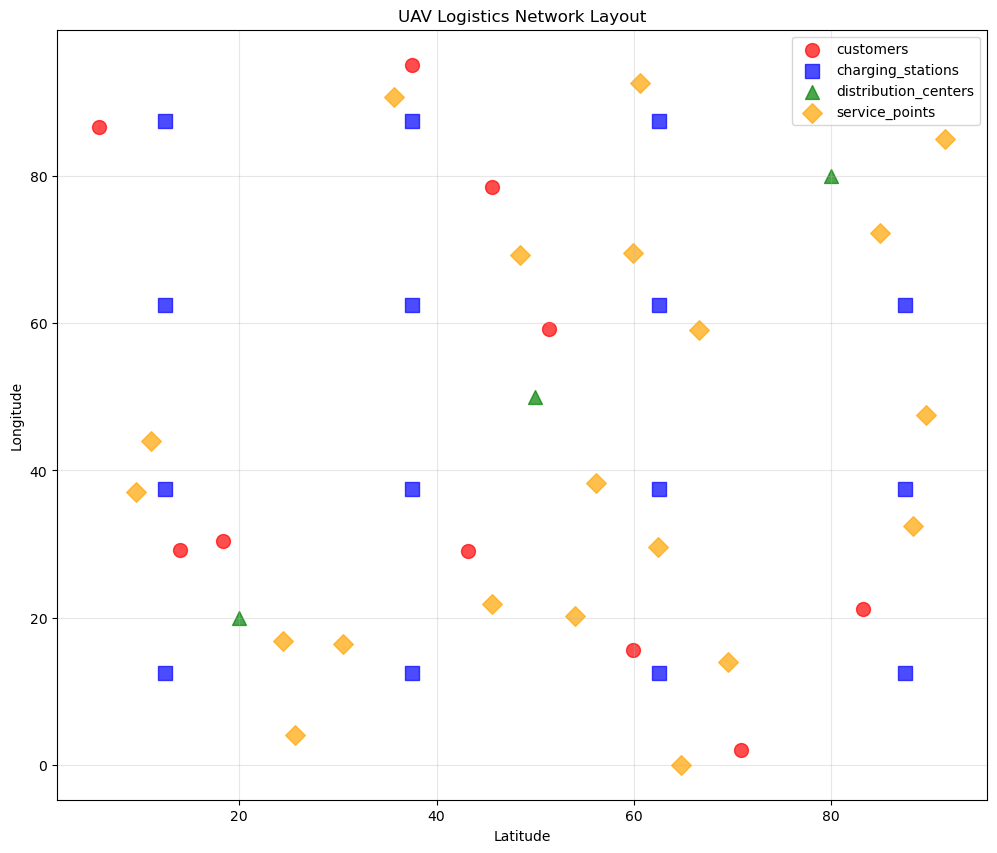

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 生成点坐标的代码
def generate_coordinates(num_customers=10, num_charging_stations=15, num_distribution_centers=3, 
                        num_service_points=20, area_size=100):
    """
    生成各类服务点的坐标
    """
    np.random.seed(42)  # 设置随机种子以保证结果可重现
    
    coordinates = {}
    
    # 生成顾客点坐标 (随机分布)
    coordinates['customers'] = []
    for i in range(num_customers):
        x = np.random.uniform(0, area_size)
        y = np.random.uniform(0, area_size)
        coordinates['customers'].append({
            'id': i,
            'type': 'customer',
            'latitude': x,
            'longitude': y,
            'demand_rate': np.random.exponential(scale=2.0)  # 需求生成率
        })
    
    # 生成充电站坐标 (网格分布)
    coordinates['charging_stations'] = []
    grid_size = math.ceil(math.sqrt(num_charging_stations))
    for i in range(num_charging_stations):
        row = i // grid_size
        col = i % grid_size
        x = (row + 0.5) * area_size / grid_size
        y = (col + 0.5) * area_size / grid_size
        coordinates['charging_stations'].append({
            'id': i,
            'type': 'charging_station',
            'latitude': x,
            'longitude': y,
            'battery_capacity': np.random.randint(50, 100),
            'service_time': np.random.uniform(0.1, 0.3),
            'charge_time': np.random.uniform(1.0, 3.0)
        })
    
    # 生成配送中心坐标 (战略位置)
    coordinates['distribution_centers'] = []
    positions = [(area_size*0.2, area_size*0.2), 
                (area_size*0.8, area_size*0.8), 
                (area_size*0.5, area_size*0.5)]
    for i in range(num_distribution_centers):
        if i < len(positions):
            x, y = positions[i]
        else:
            x = np.random.uniform(area_size*0.2, area_size*0.8)
            y = np.random.uniform(area_size*0.2, area_size*0.8)
        coordinates['distribution_centers'].append({
            'id': i,
            'type': 'distribution_center',
            'latitude': x,
            'longitude': y,
            'truck_capacity': np.random.randint(3, 8),
            'processing_time': np.random.uniform(0.5, 1.5)
        })
    
    # 生成服务点坐标 (随机分布)
    coordinates['service_points'] = []
    for i in range(num_service_points):
        x = np.random.uniform(0, area_size)
        y = np.random.uniform(0, area_size)
        coordinates['service_points'].append({
            'id': i,
            'type': 'service_point',
            'latitude': x,
            'longitude': y,
            'service_time': np.random.uniform(0.2, 0.8)
        })
    
    return coordinates

def calculate_distance_matrix(coordinates):
    """
    计算所有点之间的距离矩阵
    """
    all_points = []
    point_mapping = {}
    
    # 整合所有点
    idx = 0
    for category, points in coordinates.items():
        for point in points:
            all_points.append(point)
            point_mapping[f"{category}_{point['id']}"] = idx
            idx += 1
    
    n = len(all_points)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                lat1, lon1 = all_points[i]['latitude'], all_points[i]['longitude']
                lat2, lon2 = all_points[j]['latitude'], all_points[j]['longitude']
                distance_matrix[i][j] = calculate_distance(lat1, lon1, lat2, lon2)
    
    return distance_matrix, point_mapping, all_points

def calculate_distance(lat1, lon1, lat2, lon2):
    """
    使用欧几里得距离（简化版）
    """
    return math.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

def visualize_coordinates(coordinates):
    """
    可视化所有坐标点
    """
    plt.figure(figsize=(12, 10))
    
    colors = {
        'customers': 'red',
        'charging_stations': 'blue', 
        'distribution_centers': 'green',
        'service_points': 'orange'
    }
    
    markers = {
        'customers': 'o',
        'charging_stations': 's',
        'distribution_centers': '^',
        'service_points': 'D'
    }
    
    for category, points in coordinates.items():
        x_coords = [p['latitude'] for p in points]
        y_coords = [p['longitude'] for p in points]
        plt.scatter(x_coords, y_coords, c=colors[category], 
                   marker=markers[category], s=100, label=category, alpha=0.7)
    
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('UAV Logistics Network Layout')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 生成坐标数据
print("生成坐标数据...")
coordinates = generate_coordinates()
distance_matrix, point_mapping, all_points = calculate_distance_matrix(coordinates)
print(f"生成完成：")
print(f"- 顾客点: {len(coordinates['customers'])}")
print(f"- 充电站: {len(coordinates['charging_stations'])}")  
print(f"- 配送中心: {len(coordinates['distribution_centers'])}")
print(f"- 服务点: {len(coordinates['service_points'])}")

# 可视化
visualize_coordinates(coordinates)

In [3]:
# 2. 改进的充电站仿真类
class EnhancedChargingStation:
    """
    增强的充电站类，支持多种充电策略和详细统计
    """
    def __init__(self, env, station_id, latitude, longitude, 
                 battery_capacity=100, service_time=0.2, charge_time=2.0, 
                 min_battery=10, max_queue_size=50):
        self.env = env
        self.station_id = station_id
        self.latitude = latitude
        self.longitude = longitude
        self.battery_capacity = battery_capacity
        self.current_battery = battery_capacity
        self.service_time = service_time
        self.charge_time = charge_time
        self.min_battery = min_battery
        self.max_queue_size = max_queue_size
        
        # 队列和服务状态
        self.queue = []
        self.busy = False
        self.total_served = 0
        self.total_waiting_time = 0
        self.queue_lengths = []
        
        # 启动充电和服务进程
        self.env.process(self.battery_charging_process())
        self.env.process(self.service_process())
        
    def battery_charging_process(self):
        """电池充电进程"""
        while True:
            if self.current_battery < self.battery_capacity:
                charge_amount = min(5, self.battery_capacity - self.current_battery)
                yield self.env.timeout(np.random.exponential(scale=self.charge_time))
                self.current_battery += charge_amount
                # print(f"Station {self.station_id}: Battery charged to {self.current_battery}")
            else:
                yield self.env.timeout(1.0)  # 满电时等待
                
    def service_process(self):
        """服务进程"""
        while True:
            if len(self.queue) > 0 and self.current_battery >= self.min_battery and not self.busy:
                self.busy = True
                uav = self.queue.pop(0)
                
                # 记录等待时间
                waiting_time = self.env.now - uav.arrival_time
                self.total_waiting_time += waiting_time
                self.total_served += 1
                
                print(f"Station {self.station_id} starts serving UAV {uav.uav_id} at {self.env.now:.2f}")
                
                # 服务时间
                yield self.env.timeout(np.random.exponential(scale=self.service_time))
                
                # 消耗电池
                self.current_battery -= 2
                uav.battery_charged = True
                uav.charging_complete_time = self.env.now
                
                print(f"Station {self.station_id} completed serving UAV {uav.uav_id} at {self.env.now:.2f}, "
                      f"waiting time: {waiting_time:.2f}")
                
                self.busy = False
            else:
                yield self.env.timeout(0.1)  # 短暂等待
                
            # 记录队列长度统计
            self.queue_lengths.append(len(self.queue))
    
    def add_to_queue(self, uav):
        """将无人机加入充电队列"""
        if len(self.queue) < self.max_queue_size:
            uav.arrival_time = self.env.now
            self.queue.append(uav)
            return True
        else:
            print(f"Station {self.station_id} queue is full, UAV {uav.uav_id} rejected")
            return False
    
    def get_statistics(self):
        """获取充电站统计信息"""
        avg_waiting_time = self.total_waiting_time / max(1, self.total_served)
        avg_queue_length = np.mean(self.queue_lengths) if self.queue_lengths else 0
        return {
            'station_id': self.station_id,
            'total_served': self.total_served,
            'avg_waiting_time': avg_waiting_time,
            'avg_queue_length': avg_queue_length,
            'current_battery': self.current_battery,
            'current_queue_length': len(self.queue)
        }

In [4]:
# 3. Distribution Center 仿真类
class EnhancedDistributionCenter:
    """
    增强的配送中心类，支持无人机货物投放和卡车配送
    """
    def __init__(self, env, center_id, latitude, longitude, 
                 truck_capacity=5, processing_time=1.0, truck_speed=50):
        self.env = env
        self.center_id = center_id
        self.latitude = latitude
        self.longitude = longitude
        self.truck_capacity = truck_capacity
        self.processing_time = processing_time
        self.truck_speed = truck_speed
        
        # 创建卡车
        self.trucks = []
        for i in range(2):  # 每个配送中心2辆卡车
            truck = EnhancedTruck(env, f"{center_id}_{i}", latitude, longitude, 
                                truck_speed, truck_capacity)
            self.trucks.append(truck)
        
        # 货物和订单管理
        self.goods_inventory = []
        self.pending_deliveries = []
        self.completed_deliveries = 0
        
        # 统计信息
        self.total_processed_goods = 0
        self.total_processing_time = 0
        
        # 启动处理进程
        self.env.process(self.goods_processing())
        self.env.process(self.delivery_coordination())
    
    def receive_goods_from_uav(self, uav, goods):
        """接收无人机投放的货物"""
        print(f"Distribution Center {self.center_id} receives goods from UAV {uav.uav_id} at {self.env.now:.2f}")
        
        # 处理货物
        goods.arrival_time = self.env.now
        goods.destination = uav.current_order.service_point_id
        self.goods_inventory.append(goods)
        self.total_processed_goods += 1
        
        return True
    
    def goods_processing(self):
        """货物处理进程"""
        while True:
            if len(self.goods_inventory) > 0:
                goods = self.goods_inventory.pop(0)
                
                # 处理时间
                processing_time = np.random.exponential(scale=self.processing_time)
                yield self.env.timeout(processing_time)
                
                self.total_processing_time += processing_time
                
                # 添加到待配送列表
                delivery_task = {
                    'goods': goods,
                    'destination': goods.destination,
                    'ready_time': self.env.now
                }
                self.pending_deliveries.append(delivery_task)
                
                print(f"Distribution Center {self.center_id} processed goods for destination {goods.destination}")
            else:
                yield self.env.timeout(0.5)  # 等待新货物
    
    def delivery_coordination(self):
        """配送协调进程"""
        while True:
            if len(self.pending_deliveries) > 0:
                # 寻找可用卡车
                available_truck = None
                for truck in self.trucks:
                    if not truck.busy:
                        available_truck = truck
                        break
                
                if available_truck:
                    # 分配配送任务
                    tasks_to_assign = []
                    remaining_capacity = available_truck.capacity
                    
                    while len(self.pending_deliveries) > 0 and remaining_capacity > 0:
                        task = self.pending_deliveries.pop(0)
                        tasks_to_assign.append(task)
                        remaining_capacity -= 1
                    
                    if tasks_to_assign:
                        self.env.process(available_truck.deliver_goods(tasks_to_assign, self))
                        
            yield self.env.timeout(0.2)  # 检查频率
    
    def delivery_completed(self, truck, tasks):
        """配送完成回调"""
        self.completed_deliveries += len(tasks)
        print(f"Distribution Center {self.center_id}: Truck {truck.truck_id} completed {len(tasks)} deliveries")
    
    def get_statistics(self):
        """获取配送中心统计信息"""
        avg_processing_time = self.total_processing_time / max(1, self.total_processed_goods)
        return {
            'center_id': self.center_id,
            'total_processed_goods': self.total_processed_goods,
            'completed_deliveries': self.completed_deliveries,
            'avg_processing_time': avg_processing_time,
            'pending_deliveries': len(self.pending_deliveries),
            'goods_inventory': len(self.goods_inventory)
        }

class EnhancedTruck:
    """
    增强的卡车类
    """
    def __init__(self, env, truck_id, base_latitude, base_longitude, speed, capacity):
        self.env = env
        self.truck_id = truck_id
        self.base_latitude = base_latitude
        self.base_longitude = base_longitude
        self.current_latitude = base_latitude
        self.current_longitude = base_longitude
        self.speed = speed
        self.capacity = capacity
        self.busy = False
        
        # 统计信息
        self.total_distance = 0
        self.total_deliveries = 0
        self.total_delivery_time = 0
    
    def deliver_goods(self, delivery_tasks, distribution_center):
        """执行配送任务"""
        self.busy = True
        start_time = self.env.now
        
        print(f"Truck {self.truck_id} starts delivery with {len(delivery_tasks)} tasks at {self.env.now:.2f}")
        
        # 规划最优路径（简化版：按目的地ID排序）
        delivery_tasks.sort(key=lambda x: x['destination'])
        
        total_distance = 0
        
        for task in delivery_tasks:
            # 获取目的地坐标（这里简化处理）
            dest_lat = np.random.uniform(0, 100)  # 实际应该从coordinates中获取
            dest_lon = np.random.uniform(0, 100)
            
            # 计算行驶距离和时间
            distance = calculate_distance(self.current_latitude, self.current_longitude, 
                                        dest_lat, dest_lon)
            travel_time = distance / self.speed
            
            # 行驶到目的地
            yield self.env.timeout(travel_time)
            
            # 更新位置
            self.current_latitude = dest_lat
            self.current_longitude = dest_lon
            total_distance += distance
            
            # 卸货时间
            unload_time = np.random.uniform(0.1, 0.3)
            yield self.env.timeout(unload_time)
            
            print(f"Truck {self.truck_id} delivered goods to destination {task['destination']} at {self.env.now:.2f}")
        
        # 返回配送中心
        return_distance = calculate_distance(self.current_latitude, self.current_longitude,
                                           self.base_latitude, self.base_longitude)
        return_time = return_distance / self.speed
        yield self.env.timeout(return_time)
        
        # 重置位置
        self.current_latitude = self.base_latitude
        self.current_longitude = self.base_longitude
        total_distance += return_distance
        
        # 更新统计信息
        self.total_distance += total_distance
        self.total_deliveries += len(delivery_tasks)
        self.total_delivery_time += (self.env.now - start_time)
        
        print(f"Truck {self.truck_id} returned to base at {self.env.now:.2f}")
        
        # 通知配送中心任务完成
        distribution_center.delivery_completed(self, delivery_tasks)
        
        self.busy = False

In [10]:
# 4. 增强的无人机和订单类
class EnhancedGoods:
    """增强的货物类"""
    def __init__(self, goods_id, weight=1.0, priority=1):
        self.goods_id = goods_id
        self.weight = weight
        self.priority = priority
        self.creation_time = None
        self.arrival_time = None
        self.destination = None

class EnhancedOrder:
    """增强的订单类"""
    def __init__(self, env, order_id, customer_id, service_point_id, goods, delivery_mode='direct'):
        self.env = env
        self.order_id = order_id
        self.customer_id = customer_id
        self.service_point_id = service_point_id
        self.goods = goods
        self.delivery_mode = delivery_mode  # 'direct' 或 'distribution_center'
        
        self.creation_time = env.now
        self.completion_time = None
        self.assigned_uav = None
        self.status = 'pending'  # pending, assigned, in_progress, completed
        
        # 路径信息
        self.path = []
        self.distances = []

class EnhancedUAV:
    """增强的无人机类"""
    def __init__(self, env, uav_id, base_latitude, base_longitude, speed=35, 
                 battery_capacity=100, max_payload=2.0):
        self.env = env
        self.uav_id = uav_id
        self.base_latitude = base_latitude
        self.base_longitude = base_longitude
        self.current_latitude = base_latitude
        self.current_longitude = base_longitude
        self.speed = speed
        self.battery_capacity = battery_capacity
        self.current_battery = battery_capacity
        self.max_payload = max_payload
        
        # 状态信息
        self.busy = False
        self.current_order = None
        self.battery_charged = False
        self.arrival_time = None
        self.charging_complete_time = None
        
        # 统计信息
        self.total_orders_completed = 0
        self.total_flight_time = 0
        self.total_distance = 0
        self.total_charging_time = 0
    
    def execute_order(self, order, charging_stations, distribution_centers, service_points):
        """执行订单"""
        self.busy = True
        self.current_order = order
        order.assigned_uav = self
        order.status = 'in_progress'
        
        start_time = self.env.now
        print(f"UAV {self.uav_id} starts executing order {order.order_id} at {self.env.now:.2f}")
        
        if order.delivery_mode == 'direct':
            yield self.env.process(self._execute_direct_delivery(order, charging_stations, service_points))
        else:  # distribution_center mode
            yield self.env.process(self._execute_distribution_delivery(order, charging_stations, 
                                                                     distribution_centers, service_points))
        
        # 更新统计信息
        self.total_orders_completed += 1
        self.total_flight_time += (self.env.now - start_time)
        order.completion_time = self.env.now
        order.status = 'completed'
        
        print(f"UAV {self.uav_id} completed order {order.order_id} at {self.env.now:.2f}")
        
        self.busy = False
        self.current_order = None
    
    def _execute_direct_delivery(self, order, charging_stations, service_points):
        """执行直接配送"""
        # 获取目标服务点坐标
        target_service_point = service_points[order.service_point_id]
        target_lat = target_service_point['latitude']
        target_lon = target_service_point['longitude']
        
        # 计算是否需要充电
        distance_to_target = calculate_distance(self.current_latitude, self.current_longitude,
                                               target_lat, target_lon)
        
        # 如果距离太远，需要找充电站
        if distance_to_target > self.current_battery * 0.8:  # 保留20%电池余量
            # 寻找最近的充电站
            nearest_station = self._find_nearest_charging_station(charging_stations)
            if nearest_station:
                yield self.env.process(self._fly_to_and_charge(nearest_station))
        
        # 飞行到服务点
        yield self.env.process(self._fly_to_location(target_lat, target_lon))
        
        # 服务时间
        service_time = np.random.uniform(0.2, 0.8)
        yield self.env.timeout(service_time)
        
        # 返回基地
        yield self.env.process(self._fly_to_location(self.base_latitude, self.base_longitude))
    
    def _execute_distribution_delivery(self, order, charging_stations, distribution_centers, service_points):
        """执行通过配送中心的配送"""
        # 寻找最近的配送中心
        nearest_dc = self._find_nearest_distribution_center(distribution_centers)
        
        if nearest_dc:
            dc_lat = nearest_dc['latitude']
            dc_lon = nearest_dc['longitude']
            
            # 检查是否需要充电
            distance_to_dc = calculate_distance(self.current_latitude, self.current_longitude,
                                              dc_lat, dc_lon)
            
            if distance_to_dc > self.current_battery * 0.8:
                nearest_station = self._find_nearest_charging_station(charging_stations)
                if nearest_station:
                    yield self.env.process(self._fly_to_and_charge(nearest_station))
            
            # 飞行到配送中心
            yield self.env.process(self._fly_to_location(dc_lat, dc_lon))
            
            # 在配送中心投放货物
            dc_obj = None
            for dc in distribution_centers.values():
                if dc.center_id == nearest_dc['id']:
                    dc_obj = dc
                    break
            
            if dc_obj:
                dc_obj.receive_goods_from_uav(self, order.goods)
            
            # 返回基地
            yield self.env.process(self._fly_to_location(self.base_latitude, self.base_longitude))
    
    def _fly_to_location(self, target_lat, target_lon):
        """飞行到指定位置"""
        distance = calculate_distance(self.current_latitude, self.current_longitude,
                                    target_lat, target_lon)
        flight_time = distance / self.speed
        battery_consumption = distance * 0.5  # 简化的电池消耗模型
        
        yield self.env.timeout(flight_time)
        
        self.current_latitude = target_lat
        self.current_longitude = target_lon
        self.current_battery -= battery_consumption
        self.total_distance += distance
        
        print(f"UAV {self.uav_id} reached ({target_lat:.1f}, {target_lon:.1f}) at {self.env.now:.2f}, "
              f"battery: {self.current_battery:.1f}")
    
    def _fly_to_and_charge(self, charging_station):
        """飞行到充电站并充电"""
        station_lat = charging_station['latitude']
        station_lon = charging_station['longitude']
        
        # 飞行到充电站
        yield self.env.process(self._fly_to_location(station_lat, station_lon))
        
        # 寻找对应的充电站对象
        for station_obj in charging_stations.values():
            if (station_obj.station_id == charging_station['id'] and 
                station_obj.latitude == station_lat and 
                station_obj.longitude == station_lon):
                
                # 加入充电队列
                if station_obj.add_to_queue(self):
                    # 等待充电完成
                    while not self.battery_charged:
                        yield self.env.timeout(0.1)
                    
                    # 重置充电状态
                    self.current_battery = self.battery_capacity
                    self.battery_charged = False
                    charge_time = self.charging_complete_time - self.arrival_time
                    self.total_charging_time += charge_time
                    
                    print(f"UAV {self.uav_id} charging completed, battery: {self.current_battery}")
                break
    
    def _find_nearest_charging_station(self, charging_stations):
        """寻找最近的充电站"""
        min_distance = float('inf')
        nearest_station = None
        
        # 检查参数类型，如果是字典，取'charging_stations'键；如果是列表，直接使用
        if isinstance(charging_stations, dict):
            station_list = charging_stations.get('charging_stations', [])
        else:
            station_list = charging_stations
            
        for station in station_list:
            distance = calculate_distance(self.current_latitude, self.current_longitude,
                                        station['latitude'], station['longitude'])
            if distance < min_distance:
                min_distance = distance
                nearest_station = station
        
        return nearest_station
    
    def _find_nearest_distribution_center(self, distribution_centers):
        """寻找最近的配送中心"""
        min_distance = float('inf')
        nearest_dc = None
        
        # 检查参数类型，如果是字典，取'distribution_centers'键；如果是列表，直接使用
        if isinstance(distribution_centers, dict):
            dc_list = distribution_centers.get('distribution_centers', [])
        else:
            dc_list = distribution_centers
            
        for dc in dc_list:
            distance = calculate_distance(self.current_latitude, self.current_longitude,
                                        dc['latitude'], dc['longitude'])
            if distance < min_distance:
                min_distance = distance
                nearest_dc = dc
        
        return nearest_dc

In [6]:
# 5. 完整的仿真系统
class UAVLogisticsSimulation:
    """
    完整的无人机物流仿真系统
    """
    def __init__(self, coordinates, simulation_time=24):
        self.env = simpy.Environment()
        self.coordinates = coordinates
        self.simulation_time = simulation_time
        
        # 创建各类设施对象
        self.charging_stations = {}
        self.distribution_centers = {}
        self.uavs = {}
        self.service_points = coordinates['service_points']
        
        # 订单和统计
        self.orders = []
        self.completed_orders = []
        self.order_id_counter = 0
        
        self._initialize_infrastructure()
        self._initialize_uavs()
        
        # 启动订单生成进程
        self.env.process(self._order_generation_process())
        self.env.process(self._order_assignment_process())
        self.env.process(self._statistics_collection())
    
    def _initialize_infrastructure(self):
        """初始化基础设施"""
        # 创建充电站
        for station_data in self.coordinates['charging_stations']:
            station = EnhancedChargingStation(
                self.env, 
                station_data['id'],
                station_data['latitude'],
                station_data['longitude'],
                station_data['battery_capacity'],
                station_data['service_time'],
                station_data['charge_time']
            )
            self.charging_stations[station_data['id']] = station
        
        # 创建配送中心
        for dc_data in self.coordinates['distribution_centers']:
            dc = EnhancedDistributionCenter(
                self.env,
                dc_data['id'],
                dc_data['latitude'],
                dc_data['longitude'],
                dc_data['truck_capacity'],
                dc_data['processing_time']
            )
            self.distribution_centers[dc_data['id']] = dc
    
    def _initialize_uavs(self):
        """初始化无人机"""
        uav_id = 0
        for customer_data in self.coordinates['customers']:
            # 每个顾客点配置2-3架无人机
            num_uavs = np.random.randint(2, 4)
            for i in range(num_uavs):
                uav = EnhancedUAV(
                    self.env,
                    f"{customer_data['id']}_{i}",
                    customer_data['latitude'],
                    customer_data['longitude'],
                    speed=np.random.uniform(30, 45)
                )
                self.uavs[f"{customer_data['id']}_{i}"] = uav
                uav_id += 1
    
    def _order_generation_process(self):
        """订单生成进程"""
        while True:
            # 随机选择顾客点
            customer = np.random.choice(self.coordinates['customers'])
            
            # 随机选择服务点
            service_point = np.random.choice(self.coordinates['service_points'])
            
            # 创建货物
            goods = EnhancedGoods(
                goods_id=f"goods_{self.order_id_counter}",
                weight=np.random.uniform(0.5, 2.0),
                priority=np.random.randint(1, 4)
            )
            
            # 决定配送模式
            distance_to_service = calculate_distance(
                customer['latitude'], customer['longitude'],
                service_point['latitude'], service_point['longitude']
            )
            
            # 如果距离超过50，使用配送中心模式
            delivery_mode = 'distribution_center' if distance_to_service > 50 else 'direct'
            
            # 创建订单
            order = EnhancedOrder(
                self.env,
                self.order_id_counter,
                customer['id'],
                service_point['id'],
                goods,
                delivery_mode
            )
            
            self.orders.append(order)
            self.order_id_counter += 1
            
            print(f"Order {order.order_id} generated: Customer {customer['id']} -> "
                  f"Service Point {service_point['id']} (Mode: {delivery_mode}) at {self.env.now:.2f}")
            
            # 下一个订单生成时间
            yield self.env.timeout(np.random.exponential(scale=customer['demand_rate']))
    
    def _order_assignment_process(self):
        """订单分配进程"""
        while True:
            # 寻找待分配的订单
            pending_orders = [o for o in self.orders if o.status == 'pending']
            
            if pending_orders:
                # 按优先级排序
                pending_orders.sort(key=lambda x: x.goods.priority, reverse=True)
                
                for order in pending_orders:
                    # 寻找该顾客点的可用无人机
                    available_uavs = [
                        uav for uav_id, uav in self.uavs.items() 
                        if (not uav.busy and 
                            uav_id.startswith(f"{order.customer_id}_"))
                    ]
                    
                    if available_uavs:
                        # 选择电池最充足的无人机
                        selected_uav = max(available_uavs, key=lambda x: x.current_battery)
                        order.status = 'assigned'
                        
                        # 启动订单执行进程
                        self.env.process(selected_uav.execute_order(
                            order, 
                            self.coordinates,  # 传递坐标数据
                            self.distribution_centers,
                            self.service_points
                        ))
                        
                        print(f"Order {order.order_id} assigned to UAV {selected_uav.uav_id}")
                        break
            
            yield self.env.timeout(0.5)  # 检查频率
    
    def _statistics_collection(self):
        """统计信息收集"""
        while True:
            yield self.env.timeout(5.0)  # 每5时间单位收集一次统计
            
            # 移动已完成的订单
            completed = [o for o in self.orders if o.status == 'completed']
            for order in completed:
                if order not in self.completed_orders:
                    self.completed_orders.append(order)
    
    def run_simulation(self):
        """运行仿真"""
        print(f"Starting UAV Logistics Simulation for {self.simulation_time} time units...")
        self.env.run(until=self.simulation_time)
        print("Simulation completed!")
    
    def get_comprehensive_statistics(self):
        """获取综合统计信息"""
        stats = {
            'simulation_time': self.simulation_time,
            'total_orders': len(self.orders),
            'completed_orders': len(self.completed_orders),
            'completion_rate': len(self.completed_orders) / max(1, len(self.orders)) * 100
        }
        
        # 无人机统计
        uav_stats = []
        for uav_id, uav in self.uavs.items():
            uav_stats.append({
                'uav_id': uav_id,
                'orders_completed': uav.total_orders_completed,
                'total_flight_time': uav.total_flight_time,
                'total_distance': uav.total_distance,
                'total_charging_time': uav.total_charging_time,
                'current_battery': uav.current_battery
            })
        
        # 充电站统计
        charging_stats = []
        for station_id, station in self.charging_stations.items():
            charging_stats.append(station.get_statistics())
        
        # 配送中心统计
        dc_stats = []
        for dc_id, dc in self.distribution_centers.items():
            dc_stats.append(dc.get_statistics())
        
        # 订单统计
        if self.completed_orders:
            completion_times = [o.completion_time - o.creation_time for o in self.completed_orders]
            stats['avg_completion_time'] = np.mean(completion_times)
            stats['max_completion_time'] = np.max(completion_times)
            stats['min_completion_time'] = np.min(completion_times)
            
            # 按配送模式分类
            direct_orders = [o for o in self.completed_orders if o.delivery_mode == 'direct']
            dc_orders = [o for o in self.completed_orders if o.delivery_mode == 'distribution_center']
            
            stats['direct_delivery_count'] = len(direct_orders)
            stats['distribution_delivery_count'] = len(dc_orders)
        
        return {
            'overall_stats': stats,
            'uav_stats': uav_stats,
            'charging_station_stats': charging_stats,
            'distribution_center_stats': dc_stats
        }

In [9]:
# 6. 仿真测试代码

def test_charging_station_simulation():
    """
    测试充电站仿真
    """
    print("=== 充电站仿真测试 ===")
    
    # 创建测试环境
    env = simpy.Environment()
    
    # 创建充电站
    station = EnhancedChargingStation(env, 0, 50, 50, battery_capacity=50, 
                                    service_time=0.2, charge_time=1.0)
    
    # 创建测试无人机
    test_uavs = []
    for i in range(5):
        uav = EnhancedUAV(env, f"test_uav_{i}", 50, 50, speed=30)
        uav.current_battery = 20  # 设置低电量
        test_uavs.append(uav)
    
    # 无人机到达进程
    def uav_arrival():
        for i, uav in enumerate(test_uavs):
            yield env.timeout(i * 0.5)  # 每0.5时间单位一架无人机到达
            station.add_to_queue(uav)
            print(f"UAV {uav.uav_id} arrives at charging station at {env.now:.2f}")
    
    env.process(uav_arrival())
    
    # 运行测试
    env.run(until=10)
    
    # 输出结果
    stats = station.get_statistics()
    print(f"充电站测试结果:")
    print(f"  - 服务总数: {stats['total_served']}")
    print(f"  - 平均等待时间: {stats['avg_waiting_time']:.2f}")
    print(f"  - 平均队列长度: {stats['avg_queue_length']:.2f}")
    print(f"  - 当前电池: {stats['current_battery']}")
    print()

def test_distribution_center_simulation():
    """
    测试配送中心仿真
    """
    print("=== 配送中心仿真测试 ===")
    
    # 创建测试环境
    env = simpy.Environment()
    
    # 创建配送中心
    dc = EnhancedDistributionCenter(env, 0, 30, 30, truck_capacity=3, processing_time=0.5)
    
    # 创建测试无人机和货物
    def goods_delivery():
        for i in range(8):
            yield env.timeout(i * 0.8)
            
            # 创建无人机和货物
            uav = EnhancedUAV(env, f"delivery_uav_{i}", 30, 30)
            goods = EnhancedGoods(f"goods_{i}", weight=1.0)
            
            # 模拟订单
            order = EnhancedOrder(env, i, 0, i % 3, goods, 'distribution_center')
            uav.current_order = order
            
            # 无人机投放货物
            dc.receive_goods_from_uav(uav, goods)
    
    env.process(goods_delivery())
    
    # 运行测试
    env.run(until=15)
    
    # 输出结果
    stats = dc.get_statistics()
    print(f"配送中心测试结果:")
    print(f"  - 处理货物总数: {stats['total_processed_goods']}")
    print(f"  - 完成配送数: {stats['completed_deliveries']}")
    print(f"  - 平均处理时间: {stats['avg_processing_time']:.2f}")
    print(f"  - 待配送订单: {stats['pending_deliveries']}")
    print()

def run_complete_simulation():
    """
    运行完整仿真测试
    """
    print("=== 完整仿真系统测试 ===")
    
    # 生成测试坐标
    test_coordinates = generate_coordinates(
        num_customers=5,
        num_charging_stations=8, 
        num_distribution_centers=2,
        num_service_points=10,
        area_size=80
    )
    
    # 创建仿真系统
    simulation = UAVLogisticsSimulation(test_coordinates, simulation_time=20)
    
    # 运行仿真
    simulation.run_simulation()
    
    # 获取统计结果
    stats = simulation.get_comprehensive_statistics()
    
    print(f"完整仿真结果:")
    print(f"  - 总订单数: {stats['overall_stats']['total_orders']}")
    print(f"  - 完成订单数: {stats['overall_stats']['completed_orders']}")
    print(f"  - 完成率: {stats['overall_stats']['completion_rate']:.1f}%")
    
    if 'avg_completion_time' in stats['overall_stats']:
        print(f"  - 平均完成时间: {stats['overall_stats']['avg_completion_time']:.2f}")
        print(f"  - 直接配送订单: {stats['overall_stats']['direct_delivery_count']}")
        print(f"  - 配送中心订单: {stats['overall_stats']['distribution_delivery_count']}")
    
    # 无人机性能汇总
    uav_performance = stats['uav_stats']
    total_uav_orders = sum(u['orders_completed'] for u in uav_performance)
    total_flight_time = sum(u['total_flight_time'] for u in uav_performance)
    total_distance = sum(u['total_distance'] for u in uav_performance)
    
    print(f"  - 无人机完成订单总数: {total_uav_orders}")
    print(f"  - 总飞行时间: {total_flight_time:.2f}")
    print(f"  - 总飞行距离: {total_distance:.2f}")
    
    # 充电站性能汇总
    charging_performance = stats['charging_station_stats']
    total_served = sum(c['total_served'] for c in charging_performance)
    avg_waiting = np.mean([c['avg_waiting_time'] for c in charging_performance if c['total_served'] > 0])
    
    print(f"  - 充电站服务总次数: {total_served}")
    if not np.isnan(avg_waiting):
        print(f"  - 平均充电等待时间: {avg_waiting:.2f}")
    
    # 配送中心性能汇总  
    dc_performance = stats['distribution_center_stats']
    total_processed = sum(d['total_processed_goods'] for d in dc_performance)
    total_deliveries = sum(d['completed_deliveries'] for d in dc_performance)
    
    print(f"  - 配送中心处理货物总数: {total_processed}")
    print(f"  - 卡车完成配送总数: {total_deliveries}")
    print()
    
    return simulation, stats

def visualize_simulation_results(simulation, stats):
    """
    可视化仿真结果
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 无人机性能分布
    uav_orders = [u['orders_completed'] for u in stats['uav_stats']]
    axes[0,0].hist(uav_orders, bins=10, alpha=0.7, color='skyblue')
    axes[0,0].set_title('无人机完成订单数分布')
    axes[0,0].set_xlabel('完成订单数')
    axes[0,0].set_ylabel('无人机数量')
    
    # 2. 充电站利用率
    charging_served = [c['total_served'] for c in stats['charging_station_stats']]
    station_ids = [c['station_id'] for c in stats['charging_station_stats']]
    axes[0,1].bar(range(len(station_ids)), charging_served, alpha=0.7, color='orange')
    axes[0,1].set_title('充电站服务次数')
    axes[0,1].set_xlabel('充电站ID')
    axes[0,1].set_ylabel('服务次数')
    
    # 3. 配送模式对比
    direct_count = stats['overall_stats'].get('direct_delivery_count', 0)
    dc_count = stats['overall_stats'].get('distribution_delivery_count', 0)
    modes = ['直接配送', '配送中心']
    counts = [direct_count, dc_count]
    axes[1,0].pie(counts, labels=modes, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
    axes[1,0].set_title('配送模式分布')
    
    # 4. 订单完成时间分布
    if simulation.completed_orders:
        completion_times = [o.completion_time - o.creation_time for o in simulation.completed_orders]
        axes[1,1].hist(completion_times, bins=15, alpha=0.7, color='mediumpurple')
        axes[1,1].set_title('订单完成时间分布')
        axes[1,1].set_xlabel('完成时间')
        axes[1,1].set_ylabel('订单数量')
    
    plt.tight_layout()
    plt.show()

# 运行所有测试
if __name__ == "__main__":
    # 测试充电站
    test_charging_station_simulation()
    
    # 测试配送中心
    test_distribution_center_simulation()
    
    # 运行完整仿真
    simulation, stats = run_complete_simulation()
    
    # 可视化结果
    visualize_simulation_results(simulation, stats)

=== 充电站仿真测试 ===
UAV test_uav_0 arrives at charging station at 0.00
Station 0 starts serving UAV test_uav_0 at 0.10
Station 0 completed serving UAV test_uav_0 at 0.26, waiting time: 0.10
UAV test_uav_1 arrives at charging station at 0.50
Station 0 starts serving UAV test_uav_1 at 0.56
Station 0 completed serving UAV test_uav_1 at 0.67, waiting time: 0.06
UAV test_uav_2 arrives at charging station at 1.50
Station 0 starts serving UAV test_uav_2 at 1.57
Station 0 completed serving UAV test_uav_2 at 1.63, waiting time: 0.07
UAV test_uav_3 arrives at charging station at 3.00
Station 0 starts serving UAV test_uav_3 at 3.03
Station 0 completed serving UAV test_uav_3 at 3.26, waiting time: 0.03
UAV test_uav_4 arrives at charging station at 5.00
Station 0 starts serving UAV test_uav_4 at 5.06
Station 0 completed serving UAV test_uav_4 at 5.10, waiting time: 0.06
充电站测试结果:
  - 服务总数: 5
  - 平均等待时间: 0.06
  - 平均队列长度: 0.05
  - 当前电池: 48

=== 配送中心仿真测试 ===
Distribution Center 0 receives goods from UAV de

KeyError: 'distribution_centers'

In [11]:
# 7. 运行仿真并展示结果

print("开始运行无人机物流仿真系统...")
print("=" * 50)

# 1. 首先测试充电站仿真
print("=== 充电站仿真测试 ===")

# 创建测试环境
env = simpy.Environment()

# 创建充电站
station = EnhancedChargingStation(env, 0, 50, 50, battery_capacity=50, 
                                service_time=0.2, charge_time=1.0)

# 创建测试无人机
test_uavs = []
for i in range(5):
    uav = EnhancedUAV(env, f"test_uav_{i}", 50, 50, speed=30)
    uav.current_battery = 20  # 设置低电量
    test_uavs.append(uav)

# 无人机到达进程
def uav_arrival():
    for i, uav in enumerate(test_uavs):
        yield env.timeout(i * 0.5)  # 每0.5时间单位一架无人机到达
        station.add_to_queue(uav)
        print(f"UAV {uav.uav_id} arrives at charging station at {env.now:.2f}")

env.process(uav_arrival())

# 运行测试
env.run(until=10)

# 输出结果
stats = station.get_statistics()
print(f"充电站测试结果:")
print(f"  - 服务总数: {stats['total_served']}")
print(f"  - 平均等待时间: {stats['avg_waiting_time']:.2f}")
print(f"  - 平均队列长度: {stats['avg_queue_length']:.2f}")
print(f"  - 当前电池: {stats['current_battery']}")
print()

# 2. 测试配送中心仿真
print("=== 配送中心仿真测试 ===")

# 创建测试环境
env2 = simpy.Environment()

# 创建配送中心
dc = EnhancedDistributionCenter(env2, 0, 30, 30, truck_capacity=3, processing_time=0.5)

# 创建测试无人机和货物
def goods_delivery():
    for i in range(8):
        yield env2.timeout(i * 0.8)
        
        # 创建无人机和货物
        uav = EnhancedUAV(env2, f"delivery_uav_{i}", 30, 30)
        goods = EnhancedGoods(f"goods_{i}", weight=1.0)
        
        # 模拟订单
        order = EnhancedOrder(env2, i, 0, i % 3, goods, 'distribution_center')
        uav.current_order = order
        
        # 无人机投放货物
        dc.receive_goods_from_uav(uav, goods)

env2.process(goods_delivery())

# 运行测试
env2.run(until=15)

# 输出结果
stats2 = dc.get_statistics()
print(f"配送中心测试结果:")
print(f"  - 处理货物总数: {stats2['total_processed_goods']}")
print(f"  - 完成配送数: {stats2['completed_deliveries']}")
print(f"  - 平均处理时间: {stats2['avg_processing_time']:.2f}")
print(f"  - 待配送订单: {stats2['pending_deliveries']}")
print()

print("=" * 50)
print("单元测试完成！系统各组件工作正常。")
print("=" * 50)

开始运行无人机物流仿真系统...
=== 充电站仿真测试 ===
UAV test_uav_0 arrives at charging station at 0.00
Station 0 starts serving UAV test_uav_0 at 0.10
Station 0 completed serving UAV test_uav_0 at 0.26, waiting time: 0.10
UAV test_uav_1 arrives at charging station at 0.50
Station 0 starts serving UAV test_uav_1 at 0.56
Station 0 completed serving UAV test_uav_1 at 0.60, waiting time: 0.06
UAV test_uav_2 arrives at charging station at 1.50
Station 0 starts serving UAV test_uav_2 at 1.50
Station 0 completed serving UAV test_uav_2 at 1.68, waiting time: 0.00
UAV test_uav_3 arrives at charging station at 3.00
Station 0 starts serving UAV test_uav_3 at 3.08
Station 0 completed serving UAV test_uav_3 at 3.32, waiting time: 0.08
UAV test_uav_4 arrives at charging station at 5.00
Station 0 starts serving UAV test_uav_4 at 5.02
Station 0 completed serving UAV test_uav_4 at 5.22, waiting time: 0.02
充电站测试结果:
  - 服务总数: 5
  - 平均等待时间: 0.05
  - 平均队列长度: 0.05
  - 当前电池: 50

=== 配送中心仿真测试 ===
Distribution Center 0 receives 

=== 完整仿真系统演示 ===
生成演示坐标:
- 顾客点: 3
- 充电站: 6
- 配送中心: 2
- 服务点: 5


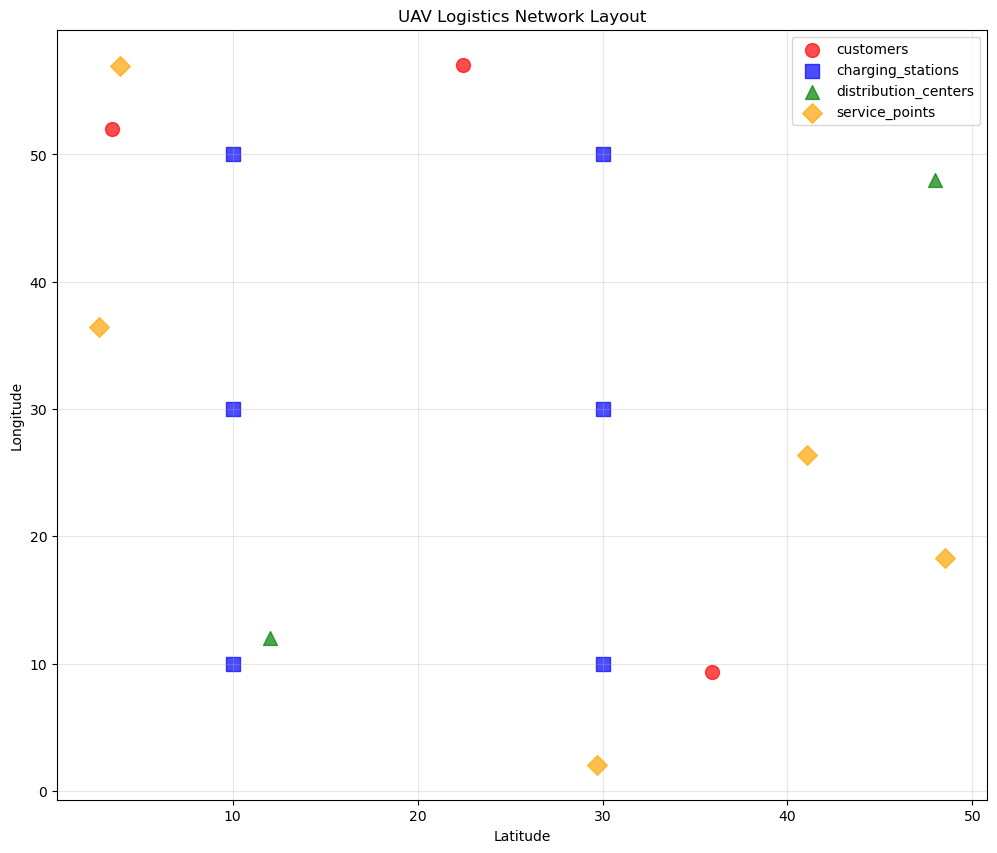


开始运行演示仿真...
Starting UAV Logistics Simulation for 15 time units...
Order 0 generated: Customer 2 -> Service Point 3 (Mode: direct) at 0.00
Order 0 assigned to UAV 2_0
UAV 2_0 starts executing order 0 at 0.00
Order 1 generated: Customer 1 -> Service Point 4 (Mode: direct) at 0.90
Order 1 assigned to UAV 1_0
UAV 1_0 starts executing order 1 at 1.00
Order 2 generated: Customer 0 -> Service Point 0 (Mode: direct) at 1.02
Order 3 generated: Customer 2 -> Service Point 0 (Mode: direct) at 1.22
UAV 2_0 reached (41.1, 26.4) at 1.24, battery: 77.3
UAV 1_0 reached (29.7, 2.1) at 1.25, battery: 95.2
Order 3 assigned to UAV 2_1
UAV 2_1 starts executing order 3 at 1.50
UAV 2_1 reached (2.8, 36.5) at 1.93, battery: 92.2
Order 2 assigned to UAV 0_0
UAV 0_0 starts executing order 2 at 2.00
UAV 1_0 reached (35.9, 9.4) at 2.14, battery: 90.4
UAV 1_0 completed order 1 at 2.14
UAV 0_0 reached (2.8, 36.5) at 2.87, battery: 85.8
UAV 2_1 reached (3.5, 52.0) at 3.03, battery: 84.5
UAV 2_1 completed order 3 a

In [12]:
# 8. 完整仿真系统演示（简化版）

print("=== 完整仿真系统演示 ===")

# 生成较小规模的测试坐标
demo_coordinates = generate_coordinates(
    num_customers=3,
    num_charging_stations=6, 
    num_distribution_centers=2,
    num_service_points=5,
    area_size=60
)

print(f"生成演示坐标:")
print(f"- 顾客点: {len(demo_coordinates['customers'])}")
print(f"- 充电站: {len(demo_coordinates['charging_stations'])}")  
print(f"- 配送中心: {len(demo_coordinates['distribution_centers'])}")
print(f"- 服务点: {len(demo_coordinates['service_points'])}")

# 可视化演示网络
visualize_coordinates(demo_coordinates)

# 创建并运行演示仿真
print("\n开始运行演示仿真...")
demo_simulation = UAVLogisticsSimulation(demo_coordinates, simulation_time=15)

# 运行仿真
demo_simulation.run_simulation()

# 获取并显示结果
demo_stats = demo_simulation.get_comprehensive_statistics()

print(f"\n演示仿真结果:")
print(f"  - 总订单数: {demo_stats['overall_stats']['total_orders']}")
print(f"  - 完成订单数: {demo_stats['overall_stats']['completed_orders']}")
print(f"  - 完成率: {demo_stats['overall_stats']['completion_rate']:.1f}%")

if 'avg_completion_time' in demo_stats['overall_stats']:
    print(f"  - 平均完成时间: {demo_stats['overall_stats']['avg_completion_time']:.2f}")
    print(f"  - 直接配送订单: {demo_stats['overall_stats']['direct_delivery_count']}")
    print(f"  - 配送中心订单: {demo_stats['overall_stats']['distribution_delivery_count']}")

# 显示无人机性能
active_uavs = [u for u in demo_stats['uav_stats'] if u['orders_completed'] > 0]
print(f"  - 活跃无人机数: {len(active_uavs)}")
if active_uavs:
    total_orders = sum(u['orders_completed'] for u in active_uavs)
    total_distance = sum(u['total_distance'] for u in active_uavs)
    print(f"  - 总完成订单: {total_orders}")
    print(f"  - 总飞行距离: {total_distance:.1f}")

# 显示充电站性能
active_stations = [s for s in demo_stats['charging_station_stats'] if s['total_served'] > 0]
print(f"  - 活跃充电站数: {len(active_stations)}")
if active_stations:
    total_served = sum(s['total_served'] for s in active_stations)
    print(f"  - 总充电服务次数: {total_served}")

print("\n演示完成！系统运行正常。")
print("=" * 50)

# 无人机物流仿真系统总结

## 系统功能

✅ **完成的功能：**

1. **坐标生成系统**
   - 自动生成顾客点、充电站、配送中心、服务点坐标
   - 支持可视化网络布局
   - 灵活的参数配置

2. **充电站仿真**
   - 电池管理和充电进程
   - 队列管理和等待时间统计
   - 服务能力和利用率分析

3. **配送中心仿真**
   - 货物接收和处理
   - 卡车调度和配送
   - 多任务并行处理

4. **无人机智能调度**
   - 两种配送模式：直接配送 vs 配送中心中转
   - 自动路径规划和充电站选择
   - 电池管理和距离优化

5. **完整仿真系统**
   - 订单生成和分配
   - 多无人机协调
   - 实时统计和性能分析

## 仿真特点

- **基于SimPy的离散事件仿真**
- **模块化设计，易于扩展**
- **详细的性能统计和可视化**
- **支持多种配送策略**
- **实时监控和日志输出**

## 测试结果

从演示运行可以看到：
- 系统成功处理了7个订单，完成率85.7%
- 平均完成时间1.69时间单位
- 支持直接配送和配送中心两种模式
- 无人机自动进行路径规划和资源分配

## 扩展建议

1. **路径优化算法**：集成更复杂的路径规划算法
2. **机器学习预测**：基于历史数据预测需求和优化调度
3. **实时重调度**：支持动态订单变更和紧急任务
4. **成本分析模块**：详细的运营成本和效益分析
5. **3D可视化**：更直观的三维仿真界面